In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestClassifier

In [2]:
fd=np.array(pd.read_csv('C:\\Users\\55019\\Desktop\\zsy颜色统计.csv',header=None,index_col=False))
ids=fd[1:,0]
head=fd[0,1:]

data=fd[1:,1:-5]
labels=fd[1:,-5:]
x_train=data[10:]
y_train=labels[10:,3].astype(int)
x_test=data[1:10]
y_test=labels[1:10,3].astype(int)
print(x_test)
print(y_test)

forest = RandomForestRegressor(n_estimators = 200, random_state = 0)
forest.fit(x_train, y_train)
pred = forest.predict(x_test)
print(MSE(y_test, pred))
print(pred)

linear = LinearRegression()
linear.fit(x_train, y_train)
pred = linear.predict(x_test)
print(MSE(y_test, pred)) 
#print(pred)

svm = SVR()
svm.fit(x_train, y_train)
pred = svm.predict(x_test)
print(MSE(y_test, pred)) 
#print(pred)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred = gbr.predict(x_test)
print(MSE(y_test, pred)) 
#print(pred)

br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
br.fit(x_train, y_train)
pred = br.predict(x_test)
print(MSE(y_test, pred)) 
#print(pred)

etc = ElasticNet()  # 建立弹性网络回归模型对象
etc.fit(x_train, y_train)
pred = etc.predict(x_test)
print(MSE(y_test, pred)) 
#print(pred)

mlp = MLPRegressor()  # 建立弹性网络回归模型对象
mlp.fit(x_train, y_train)
pred = mlp.predict(x_test)
print('mlp:',MSE(y_test, pred)) 
#print(pred)

forest = RandomForestClassifier()
forest.fit(x_train, y_train)
pred = forest.predict(x_test)
print(accuracy_score(y_test,pred))

[['1' '12' '15' '11' '9' '9' '16' '0' '20' '7']
 ['8' '17' '20' '0' '15' '13' '0' '0' '11' '16']
 ['17' '13' '8' '4' '11' '11' '1' '5' '7' '22']
 ['28' '16' '32' '2' '1' '6' '1' '0' '0' '14']
 ['24' '9' '0' '2' '7' '6' '5' '3' '30' '14']
 ['18' '11' '18' '0' '14' '13' '1' '2' '9' '14']
 ['4' '14' '30' '8' '5' '3' '10' '12' '1' '13']
 ['3' '18' '10' '19' '3' '10' '20' '0' '4' '13']
 ['6' '21' '8' '4' '6' '24' '0' '5' '17' '9']]
[0 1 0 1 1 0 0 1 0]
0.21860000000000002
[0.395 0.255 0.07  0.64  0.26  0.2   0.525 0.745 0.44 ]
0.2613536480992312
0.22459152623673515
0.4444326395583788
0.25370097754696713
0.25227030730544686
mlp: 1.1640769885573115
0.6666666666666666


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy
from PIL import Image
from numpy import *
import cv2
import torch.nn as nn
import torch
#from model import ResNet, BasicBlock, Bottleneck, resnet34
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import DataLoader

from sklearn.model_selection import cross_val_score

In [3]:
path0 = "D:\\zsy\\image-sentiment-analysis-master\\image\\neg\\"
path1 = "D:\\zsy\\image-sentiment-analysis-master\\image\\pos\\"
fsize=128

negfiles = os.listdir(path0) 
posfiles = os.listdir(path1) 

neg=[]
for i in negfiles:
    #print(path0+i)
    if '.jpg' in i:
        figure=cv2.imread(path0+i)
        figure=cv2.resize(figure,(fsize,fsize))
        figure=cv2.cvtColor(figure, cv2.COLOR_BGR2GRAY)
        figure=figure.reshape(fsize,fsize,1)
        figure = np.concatenate((figure, figure, figure), axis=-1)
        neg.append(figure)
neglabels=[0]*len(neg) 
pos=[]
for i in posfiles:
    if '.jpg' in i:
        figure=cv2.imread(path1+i)
        figure=cv2.resize(figure,(fsize,fsize))
        figure=cv2.cvtColor(figure, cv2.COLOR_BGR2GRAY)
        figure=figure.reshape(fsize,fsize,1)
        figure = np.concatenate((figure, figure, figure), axis=-1)
        pos.append(figure)
poslabels=[1]*len(pos)

print(np.array(neg).shape)
#print(neglabels)
print(np.array(pos).shape)
#print(poslabels)

x_train,x_test, y_train, y_test =train_test_split(neg+pos,neglabels+poslabels,test_size=0.2)

(250, 128, 128, 3)
(250, 128, 128, 3)


In [4]:
#resnet50
print(np.array(x_train).shape)
print(np.array(x_test).shape)

X_train=torch.tensor(x_train)
Y_train=torch.tensor(y_train,dtype=torch.long)
#Y_train=torch.tensor(neglabels+poslabels,dtype=torch.long)
#X_train=torch.tensor(neg+pos)
X_train=np.transpose(X_train, (0,3,1,2)).float()
X_test=torch.tensor(x_test)
Y_test=torch.tensor(y_test,dtype=torch.long)
X_test=np.transpose(X_test, (0,3,1,2)).float()

print(X_train.shape)
print(X_test.shape)

resnet = models.resnet50(num_classes=2)
loss_function = nn.CrossEntropyLoss()   # 交叉熵损失
#optimizer = optim.Adam(resnet.parameters(), lr=0.001)     # 优化器(训练参数, 学习率)
optimizer = torch.optim.SGD(resnet.parameters(), lr=0.005)
#logits = net(x_train)

epochs=100
batch=50
X_train=X_train[:int(len(X_train)/batch)*batch].reshape(batch,int(len(X_train)/batch),3,128,128)
Y_train=Y_train[:int(len(Y_train)/batch)*batch].reshape(batch,int(len(Y_train)/batch))
bb=len(X_train)

resnet_loss=[]
for epoch in range(epochs):
    loss_total=0
    for b in range(bb):
        optimizer.zero_grad()
        logits = resnet(X_train[b])
        loss = loss_function(logits, Y_train[b])   # 计算损失值
        
        loss_total+=loss
        loss.backward()     # 方向传播
        optimizer.step()    # 更新优化器参数
    print('epoch:'+str(epoch)+'----'+str(loss_total/bb))
    resnet_loss.append(loss_total)

resnet.eval()
#outputs = resnet(X_test)
#print(accuracy_score(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))
#print(classification_report(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))

files = os.listdir('D:\\zsy\\student_model\\') 
figs=[]
indexs=[]
for i in files:
    if '.png' in i:
        indexs.append(i)
        figure=cv2.imread('D:\\zsy\\student_model\\'+i)
        
        figure=cv2.resize(figure,(fsize,fsize))
        figure=cv2.cvtColor(figure, cv2.COLOR_BGR2GRAY)
        figure=figure.reshape(fsize,fsize,1)
        figure = np.concatenate((figure, figure, figure), axis=-1)
        figs.append(figure)

infig=torch.tensor(figs)
infig=np.transpose(infig, (0,3,1,2)).float()
print(indexs)
outputs = resnet(infig)
resnet50_out=outputs
print(np.argmax(outputs.detach().numpy(),axis=1))
out=np.argmax(outputs.detach().numpy(),axis=1)

fd=np.array(pd.read_csv('D:\\zsy\\zsy颜色统计.csv',index_col=False))
score={}
for i in fd:
    score[str(i[0])+'.png']=[i[12],i[14],i[15],i[16]]

pred_score=[]
ss=0
for x in range(len(indexs)):
    if out[x]==score[indexs[x]][1]:
            ss+=1   
    pred_score.append([indexs[x],score[indexs[x]][1],out[x],score[indexs[x]][2],score[indexs[x]][3]])

print('accuracy:',ss/len(indexs))
pd.DataFrame(pred_score,columns=['file','label','predict','confidence','confidence_label']).to_csv('C:\\Users\\55019\\Desktop\\result_gray\\result_resnet50_feature2.csv')

(400, 128, 128, 3)
(100, 128, 128, 3)


C:\Users\55019\AppData\Local\Temp\ipykernel_14264\3035212172.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  X_train=torch.tensor(x_train)


torch.Size([400, 3, 128, 128])
torch.Size([100, 3, 128, 128])
epoch:0----tensor(2.5495, grad_fn=<DivBackward0>)
epoch:1----tensor(2.0442, grad_fn=<DivBackward0>)
epoch:2----tensor(1.8762, grad_fn=<DivBackward0>)
epoch:3----tensor(1.6610, grad_fn=<DivBackward0>)
epoch:4----tensor(1.5804, grad_fn=<DivBackward0>)
epoch:5----tensor(1.3754, grad_fn=<DivBackward0>)
epoch:6----tensor(1.2657, grad_fn=<DivBackward0>)
epoch:7----tensor(1.1267, grad_fn=<DivBackward0>)
epoch:8----tensor(0.9156, grad_fn=<DivBackward0>)
epoch:9----tensor(0.9415, grad_fn=<DivBackward0>)
epoch:10----tensor(0.7071, grad_fn=<DivBackward0>)
epoch:11----tensor(0.6483, grad_fn=<DivBackward0>)
epoch:12----tensor(0.5836, grad_fn=<DivBackward0>)
epoch:13----tensor(0.6345, grad_fn=<DivBackward0>)
epoch:14----tensor(0.6213, grad_fn=<DivBackward0>)
epoch:15----tensor(0.6288, grad_fn=<DivBackward0>)
epoch:16----tensor(0.3436, grad_fn=<DivBackward0>)
epoch:17----tensor(0.4348, grad_fn=<DivBackward0>)
epoch:18----tensor(0.3689, gra

In [5]:
outputs = resnet(X_test)
print(classification_report(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        51
           1       0.63      0.63      0.63        49

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



In [6]:
#resnet101
print(np.array(x_train).shape)
print(np.array(x_test).shape)

X_train=torch.tensor(x_train)
Y_train=torch.tensor(y_train,dtype=torch.long)
X_train=np.transpose(X_train, (0,3,1,2)).float()
X_test=torch.tensor(x_test)
Y_test=torch.tensor(y_test,dtype=torch.long)
X_test=np.transpose(X_test, (0,3,1,2)).float()

print(X_train.shape)
print(X_test.shape)

resnet = models.resnet101(num_classes=2)
loss_function = nn.CrossEntropyLoss()   # 交叉熵损失
#optimizer = optim.Adam(resnet.parameters(), lr=0.001)     # 优化器(训练参数, 学习率)
optimizer = torch.optim.SGD(resnet.parameters(), lr=0.005)
#logits = net(x_train)

epochs=100
batch=50
X_train=X_train[:int(len(X_train)/batch)*batch].reshape(batch,int(len(X_train)/batch),3,128,128)
Y_train=Y_train[:int(len(Y_train)/batch)*batch].reshape(batch,int(len(Y_train)/batch))
bb=len(X_train)

resnet_loss101=[]
for epoch in range(epochs):
    loss_total=0
    for b in range(bb):
        optimizer.zero_grad()
        logits = resnet(X_train[b])
        loss = loss_function(logits, Y_train[b])   # 计算损失值
        
        loss_total+=loss
        loss.backward()     # 方向传播
        optimizer.step()    # 更新优化器参数
    print('epoch:'+str(epoch)+'----'+str(loss_total/bb))
    resnet_loss101.append(loss_total)

resnet.eval()
outputs = resnet(X_test)
print(accuracy_score(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))
print(classification_report(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))

files = os.listdir('D:\\zsy\\student_model\\') 
figs=[]
indexs=[]
for i in files:
    if '.png' in i:
        indexs.append(i)
        figure=cv2.imread('D:\\zsy\\student_model\\'+i)
        
        figure=cv2.resize(figure,(fsize,fsize))
        figure=cv2.cvtColor(figure, cv2.COLOR_BGR2GRAY)
        figure=figure.reshape(fsize,fsize,1)
        figure = np.concatenate((figure, figure, figure), axis=-1)
        figs.append(figure)

infig=torch.tensor(figs)
infig=np.transpose(infig, (0,3,1,2)).float()
print(indexs)
outputs = resnet(infig)
resnet101_out=outputs
print(np.argmax(outputs.detach().numpy(),axis=1))
out=np.argmax(outputs.detach().numpy(),axis=1)

fd=np.array(pd.read_csv('D:\\zsy\\zsy颜色统计.csv',index_col=False))
score={}
for i in fd:
    score[str(i[0])+'.png']=[i[12],i[14],i[15],i[16]]

pred_score=[]
ss=0
for x in range(len(indexs)):
    if out[x]==score[indexs[x]][1]:
            ss+=1   
    pred_score.append([indexs[x],score[indexs[x]][1],out[x],score[indexs[x]][2],score[indexs[x]][3]])

print('accuracy:',ss/len(indexs))
pd.DataFrame(pred_score,columns=['file','label','predict','confidence','confidence_label']).to_csv('C:\\Users\\55019\\Desktop\\result_gray\\result_resnet101_feature2.csv')

(400, 128, 128, 3)
(100, 128, 128, 3)
torch.Size([400, 3, 128, 128])
torch.Size([100, 3, 128, 128])
epoch:0----tensor(2.1476, grad_fn=<DivBackward0>)
epoch:1----tensor(1.7905, grad_fn=<DivBackward0>)
epoch:2----tensor(1.5488, grad_fn=<DivBackward0>)
epoch:3----tensor(1.4465, grad_fn=<DivBackward0>)
epoch:4----tensor(1.3387, grad_fn=<DivBackward0>)
epoch:5----tensor(1.2297, grad_fn=<DivBackward0>)
epoch:6----tensor(1.1367, grad_fn=<DivBackward0>)
epoch:7----tensor(1.1084, grad_fn=<DivBackward0>)
epoch:8----tensor(1.1180, grad_fn=<DivBackward0>)
epoch:9----tensor(0.9641, grad_fn=<DivBackward0>)
epoch:10----tensor(0.8656, grad_fn=<DivBackward0>)
epoch:11----tensor(0.7689, grad_fn=<DivBackward0>)
epoch:12----tensor(0.6333, grad_fn=<DivBackward0>)
epoch:13----tensor(0.7526, grad_fn=<DivBackward0>)
epoch:14----tensor(0.8444, grad_fn=<DivBackward0>)
epoch:15----tensor(0.7552, grad_fn=<DivBackward0>)
epoch:16----tensor(0.5885, grad_fn=<DivBackward0>)
epoch:17----tensor(0.6123, grad_fn=<DivBack

In [7]:
#resnet152
print(np.array(x_train).shape)
print(np.array(x_test).shape)

X_train=torch.tensor(x_train)
Y_train=torch.tensor(y_train,dtype=torch.long)
X_train=np.transpose(X_train, (0,3,1,2)).float()
X_test=torch.tensor(x_test)
Y_test=torch.tensor(y_test,dtype=torch.long)
X_test=np.transpose(X_test, (0,3,1,2)).float()

print(X_train.shape)
print(X_test.shape)

resnet = models.resnet152(num_classes=2)
loss_function = nn.CrossEntropyLoss()   # 交叉熵损失
#optimizer = optim.Adam(resnet.parameters(), lr=0.001)     # 优化器(训练参数, 学习率)
optimizer = torch.optim.SGD(resnet.parameters(), lr=0.005)
#logits = net(x_train)

epochs=100
batch=50
X_train=X_train[:int(len(X_train)/batch)*batch].reshape(batch,int(len(X_train)/batch),3,128,128)
Y_train=Y_train[:int(len(Y_train)/batch)*batch].reshape(batch,int(len(Y_train)/batch))
bb=len(X_train)

resnet_loss152=[]
for epoch in range(epochs):
    loss_total=0
    for b in range(bb):
        optimizer.zero_grad()
        logits = resnet(X_train[b])
        loss = loss_function(logits, Y_train[b])   # 计算损失值
        
        loss_total+=loss
        loss.backward()     # 方向传播
        optimizer.step()    # 更新优化器参数
    print('epoch:'+str(epoch)+'----'+str(loss_total/bb))
    resnet_loss152.append(loss_total)

resnet.eval()
outputs = resnet(X_test)
print(accuracy_score(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))
print(classification_report(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))

files = os.listdir('D:\\zsy\\student_model\\') 
figs=[]
indexs=[]
for i in files:
    if '.png' in i:
        indexs.append(i)
        figure=cv2.imread('D:\\zsy\\student_model\\'+i)
        
        figure=cv2.resize(figure,(fsize,fsize))
        figure=cv2.cvtColor(figure, cv2.COLOR_BGR2GRAY)
        figure=figure.reshape(fsize,fsize,1)
        figure = np.concatenate((figure, figure, figure), axis=-1)
        figs.append(figure)

infig=torch.tensor(figs)
infig=np.transpose(infig, (0,3,1,2)).float()
print(indexs)
outputs = resnet(infig)
resnet152_out=outputs
print(np.argmax(outputs.detach().numpy(),axis=1))
out=np.argmax(outputs.detach().numpy(),axis=1)

fd=np.array(pd.read_csv('D:\\zsy\\zsy颜色统计.csv',index_col=False))
score={}
for i in fd:
    score[str(i[0])+'.png']=[i[12],i[14],i[15],i[16]]

pred_score=[]
ss=0
for x in range(len(indexs)):
    if out[x]==score[indexs[x]][1]:
            ss+=1   
    pred_score.append([indexs[x],score[indexs[x]][1],out[x],score[indexs[x]][2],score[indexs[x]][3]])

print('accuracy:',ss/len(indexs))
pd.DataFrame(pred_score,columns=['file','label','predict','confidence','confidence_label']).to_csv('C:\\Users\\55019\\Desktop\\result_gray\\result_resnet152_feature2.csv')

(400, 128, 128, 3)
(100, 128, 128, 3)
torch.Size([400, 3, 128, 128])
torch.Size([100, 3, 128, 128])
epoch:0----tensor(1.8694, grad_fn=<DivBackward0>)
epoch:1----tensor(1.5235, grad_fn=<DivBackward0>)
epoch:2----tensor(1.4088, grad_fn=<DivBackward0>)
epoch:3----tensor(1.4443, grad_fn=<DivBackward0>)
epoch:4----tensor(1.2629, grad_fn=<DivBackward0>)
epoch:5----tensor(1.1732, grad_fn=<DivBackward0>)
epoch:6----tensor(1.1708, grad_fn=<DivBackward0>)
epoch:7----tensor(0.8613, grad_fn=<DivBackward0>)
epoch:8----tensor(0.8761, grad_fn=<DivBackward0>)
epoch:9----tensor(0.8907, grad_fn=<DivBackward0>)
epoch:10----tensor(0.8078, grad_fn=<DivBackward0>)
epoch:11----tensor(0.7175, grad_fn=<DivBackward0>)
epoch:12----tensor(0.7333, grad_fn=<DivBackward0>)
epoch:13----tensor(0.6509, grad_fn=<DivBackward0>)
epoch:14----tensor(0.7908, grad_fn=<DivBackward0>)
epoch:15----tensor(1.1092, grad_fn=<DivBackward0>)
epoch:16----tensor(0.8621, grad_fn=<DivBackward0>)
epoch:17----tensor(0.5988, grad_fn=<DivBack

In [8]:
#vgg
X_train=torch.tensor(x_train)
Y_train=torch.tensor(y_train,dtype=torch.long)
X_train=np.transpose(X_train, (0,3,1,2)).float()
X_test=torch.tensor(x_test)
Y_test=torch.tensor(y_test,dtype=torch.long)
X_test=np.transpose(X_test, (0,3,1,2)).float()

vgg = models.vgg16(pretrained=False)
vgg.classifier.add_module("add_linear",torch.nn.Linear(1000,2))
loss_function = nn.CrossEntropyLoss()   # 交叉熵损失
#optimizer = optim.Adam(vgg.parameters(), lr=0.001)     # 优化器(训练参数, 学习率)
optimizer = torch.optim.SGD(vgg.parameters(), lr=0.005)
#logits = net(x_train)

epochs=100
batch=50
X_train=X_train[:int(len(X_train)/batch)*batch].reshape(batch,int(len(X_train)/batch),3,128,128)
Y_train=Y_train[:int(len(Y_train)/batch)*batch].reshape(batch,int(len(Y_train)/batch))
bb=len(X_train)

vgg_loss=[]
for epoch in range(epochs):
    loss_total=0
    for b in range(bb):
        optimizer.zero_grad()
        logits = vgg(X_train[b])
        loss = loss_function(logits, Y_train[b])   # 计算损失值
        
        loss_total+=loss
        loss.backward()     # 方向传播
        optimizer.step()    # 更新优化器参数
    print('epoch:'+str(epoch)+'----'+str(loss_total/bb))
    vgg_loss.append(loss_total)

vgg.eval()
outputs = vgg(X_test)
print(accuracy_score(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))
print(classification_report(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))

files = os.listdir('D:\\zsy\\student_model\\') 
figs=[]
indexs=[]
for i in files:
    if '.png' in i:
        indexs.append(i)
        figure=cv2.imread('D:\\zsy\\student_model\\'+i)
        
        figure=cv2.resize(figure,(fsize,fsize))
        figure=cv2.cvtColor(figure, cv2.COLOR_BGR2GRAY)
        figure=figure.reshape(fsize,fsize,1)
        figure = np.concatenate((figure, figure, figure), axis=-1)
        figs.append(figure)

infig=torch.tensor(figs)
infig=np.transpose(infig, (0,3,1,2)).float()
print(indexs)
outputs = vgg(infig)
vgg_out=outputs
print(np.argmax(outputs.detach().numpy(),axis=1))
out=np.argmax(outputs.detach().numpy(),axis=1)

fd=np.array(pd.read_csv('D:\\zsy\\zsy颜色统计.csv',index_col=False))
score={}
for i in fd:
    score[str(i[0])+'.png']=[i[12],i[14],i[15],i[16]]

pred_score=[]
ss=0
for x in range(len(indexs)):
    if out[x]==score[indexs[x]][1]:
            ss+=1   
    pred_score.append([indexs[x],score[indexs[x]][1],out[x],score[indexs[x]][2],score[indexs[x]][3]])

print('accuracy:',ss/len(indexs))
pd.DataFrame(pred_score,columns=['file','label','predict','confidence','confidence_label']).to_csv('C:\\Users\\55019\\Desktop\\result_gray\\result_vgg_feature2.csv')

C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch:0----tensor(nan, grad_fn=<DivBackward0>)
epoch:1----tensor(nan, grad_fn=<DivBackward0>)
epoch:2----tensor(nan, grad_fn=<DivBackward0>)
epoch:3----tensor(nan, grad_fn=<DivBackward0>)
epoch:4----tensor(nan, grad_fn=<DivBackward0>)
epoch:5----tensor(nan, grad_fn=<DivBackward0>)
epoch:6----tensor(nan, grad_fn=<DivBackward0>)
epoch:7----tensor(nan, grad_fn=<DivBackward0>)
epoch:8----tensor(nan, grad_fn=<DivBackward0>)
epoch:9----tensor(nan, grad_fn=<DivBackward0>)
epoch:10----tensor(nan, grad_fn=<DivBackward0>)
epoch:11----tensor(nan, grad_fn=<DivBackward0>)
epoch:12----tensor(nan, grad_fn=<DivBackward0>)
epoch:13----tensor(nan, grad_fn=<DivBackward0>)
epoch:14----tensor(nan, grad_fn=<DivBackward0>)
epoch:15----tensor(nan, grad_fn=<DivBackward0>)
epoch:16----tensor(nan, grad_fn=<DivBackward0>)
epoch:17----tensor(nan, grad_fn=<DivBackward0>)
epoch:18----tensor(nan, grad_fn=<DivBackward0>)
epoch:19----tensor(nan, grad_fn=<DivBackward0>)
epoch:20----tensor(nan, grad_fn=<DivBackward0>)
ep

C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['1.png', '12.png', '13.png', '14.png', '16.png', '17.png', '18.png', '20.png', '21.png', '23.png', '24.png', '27.png', '3.png', '30.png', '31.png', '32.png', '33.png', '34.png', '37.png', '38.png', '39.png', '4.png', '41.png', '42.png', '45.png', '46.png', '9.png']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy: 0.6296296296296297


In [9]:
#alexnet
X_train=torch.tensor(x_train)
Y_train=torch.tensor(y_train,dtype=torch.long)
X_train=np.transpose(X_train, (0,3,1,2)).float()
X_test=torch.tensor(x_test)
Y_test=torch.tensor(y_test,dtype=torch.long)
X_test=np.transpose(X_test, (0,3,1,2)).float()

alexnet = models.alexnet(pretrained=False)
alexnet.classifier.add_module("add_linear",torch.nn.Linear(1000,2))
loss_function = nn.CrossEntropyLoss()   # 交叉熵损失
#optimizer = optim.Adam(alexnet.parameters(), lr=0.001)     # 优化器(训练参数, 学习率)
optimizer = torch.optim.SGD(alexnet.parameters(), lr=0.005)
#logits = net(x_train)

epochs=100
batch=50
X_train=X_train[:int(len(X_train)/batch)*batch].reshape(batch,int(len(X_train)/batch),3,128,128)
Y_train=Y_train[:int(len(Y_train)/batch)*batch].reshape(batch,int(len(Y_train)/batch))
bb=len(X_train)

alexnet_loss=[]
for epoch in range(epochs):
    loss_total=0
    for b in range(bb):
        optimizer.zero_grad()
        logits = alexnet(X_train[b])
        loss = loss_function(logits, Y_train[b])   # 计算损失值
        
        loss_total+=loss
        loss.backward()     # 方向传播
        optimizer.step()    # 更新优化器参数
    print('epoch:'+str(epoch)+'----'+str(loss_total/bb))
    alexnet_loss.append(loss_total)

alexnet.eval()
outputs = alexnet(X_test)
print(accuracy_score(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))
print(classification_report(Y_test,np.argmax(outputs.detach().numpy(),axis=1)))

files = os.listdir('D:\\zsy\\student_model\\') 
figs=[]
indexs=[]
for i in files:
    if '.png' in i:
        indexs.append(i)
        figure=cv2.imread('D:\\zsy\\student_model\\'+i)
        
        figure=cv2.resize(figure,(fsize,fsize))
        figure=cv2.cvtColor(figure, cv2.COLOR_BGR2GRAY)
        figure=figure.reshape(fsize,fsize,1)
        figure = np.concatenate((figure, figure, figure), axis=-1)
        figs.append(figure)

infig=torch.tensor(figs)
infig=np.transpose(infig, (0,3,1,2)).float()
print(indexs)
outputs = alexnet(infig)
alexnet_out=outputs
print(np.argmax(outputs.detach().numpy(),axis=1))
out=np.argmax(outputs.detach().numpy(),axis=1)

fd=np.array(pd.read_csv('D:\\zsy\\zsy颜色统计.csv',index_col=False))
score={}
for i in fd:
    score[str(i[0])+'.png']=[i[12],i[14],i[15],i[16]]

pred_score=[]
ss=0
for x in range(len(indexs)):
    if out[x]==score[indexs[x]][1]:
            ss+=1   
    pred_score.append([indexs[x],score[indexs[x]][1],out[x],score[indexs[x]][2],score[indexs[x]][3]])

print('accuracy:',ss/len(indexs))
pd.DataFrame(pred_score,columns=['file','label','predict','confidence','confidence_label']).to_csv('C:\\Users\\55019\\Desktop\\result_gray\\result_alexnet_feature2.csv')

C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch:0----tensor(0.7442, grad_fn=<DivBackward0>)
epoch:1----tensor(0.6967, grad_fn=<DivBackward0>)
epoch:2----tensor(0.6939, grad_fn=<DivBackward0>)
epoch:3----tensor(0.6918, grad_fn=<DivBackward0>)
epoch:4----tensor(0.6851, grad_fn=<DivBackward0>)
epoch:5----tensor(0.6717, grad_fn=<DivBackward0>)
epoch:6----tensor(0.6487, grad_fn=<DivBackward0>)
epoch:7----tensor(0.6120, grad_fn=<DivBackward0>)
epoch:8----tensor(0.5836, grad_fn=<DivBackward0>)
epoch:9----tensor(0.5494, grad_fn=<DivBackward0>)
epoch:10----tensor(0.5333, grad_fn=<DivBackward0>)
epoch:11----tensor(0.5017, grad_fn=<DivBackward0>)
epoch:12----tensor(0.4725, grad_fn=<DivBackward0>)
epoch:13----tensor(0.4445, grad_fn=<DivBackward0>)
epoch:14----tensor(0.4026, grad_fn=<DivBackward0>)
epoch:15----tensor(0.4022, grad_fn=<DivBackward0>)
epoch:16----tensor(0.4084, grad_fn=<DivBackward0>)
epoch:17----tensor(0.3944, grad_fn=<DivBackward0>)
epoch:18----tensor(0.4234, grad_fn=<DivBackward0>)
epoch:19----tensor(0.3046, grad_fn=<DivBa

In [10]:
fd=np.array(pd.read_csv('D:\\zsy\\zsy颜色统计.csv',index_col=False))
score={}
for i in fd:
    score[str(i[0])+'.png']=[i[12],i[14],i[15],i[16]]

files = os.listdir('D:\\zsy\\student_model\\') 
figs=[]
indexs=[]
for i in files:
    if '.png' in i:
        indexs.append(score[i][1])
        

print(classification_report(indexs,np.argmax(resnet50_out.detach().numpy(),axis=1)))
print(classification_report(indexs,np.argmax(resnet101_out.detach().numpy(),axis=1)))
print(classification_report(indexs,np.argmax(resnet152_out.detach().numpy(),axis=1)))
print(classification_report(indexs,np.argmax(vgg_out.detach().numpy(),axis=1)))
print(classification_report(indexs,np.argmax(alexnet_out.detach().numpy(),axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.35      0.48        17
           1       0.42      0.80      0.55        10

    accuracy                           0.52        27
   macro avg       0.59      0.58      0.52        27
weighted avg       0.63      0.52      0.51        27

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.37      1.00      0.54        10

    accuracy                           0.37        27
   macro avg       0.19      0.50      0.27        27
weighted avg       0.14      0.37      0.20        27

              precision    recall  f1-score   support

           0       0.78      0.41      0.54        17
           1       0.44      0.80      0.57        10

    accuracy                           0.56        27
   macro avg       0.61      0.61      0.55        27
weighted avg       0.65      0.56      0.55        27

              preci

C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\5501

In [11]:
fd=np.array(pd.read_csv('D:\\zsy\\zsy颜色统计.csv',index_col=False))
score={}
for i in fd:
    score[str(i[0])+'.png']=[i[12],i[14],i[15],i[16]]

files = os.listdir('D:\\zsy\\student_model\\') 
figs=[]
indexs=[]
for i in files:
    if '.png' in i:
        indexs.append(i)

data=[]
for i in range(len(indexs)):
    if score[indexs[i]][3]==0:
        data.append([np.argmax(resnet50_out[i].detach().numpy()),score[indexs[i]][1]])
data=np.array(data)        
print(classification_report(data[:,0],data[:,1]))

data=[]
for i in range(len(indexs)):
    if score[indexs[i]][3]==0:
        data.append([np.argmax(resnet101_out[i].detach().numpy()),score[indexs[i]][1]])
data=np.array(data)        
print(classification_report(data[:,0],data[:,1]))

data=[]
for i in range(len(indexs)):
    if score[indexs[i]][3]==0:
        data.append([np.argmax(resnet152_out[i].detach().numpy()),score[indexs[i]][1]])
data=np.array(data)        
print(classification_report(data[:,0],data[:,1]))

data=[]
for i in range(len(indexs)):
    if score[indexs[i]][3]==0:
        data.append([np.argmax(vgg_out[i].detach().numpy()),score[indexs[i]][1]])
data=np.array(data)        
print(classification_report(data[:,0],data[:,1]))

data=[]
for i in range(len(indexs)):
    if score[indexs[i]][3]==0:
        data.append([np.argmax(alexnet_out[i].detach().numpy()),score[indexs[i]][1]])
data=np.array(data)        
print(classification_report(data[:,0],data[:,1]))

              precision    recall  f1-score   support

           0       0.38      0.83      0.53         6
           1       0.75      0.27      0.40        11

    accuracy                           0.47        17
   macro avg       0.57      0.55      0.46        17
weighted avg       0.62      0.47      0.44        17

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.24      0.38        17

    accuracy                           0.24        17
   macro avg       0.50      0.12      0.19        17
weighted avg       1.00      0.24      0.38        17

              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.75      0.33      0.46         9

    accuracy                           0.59        17
   macro avg       0.64      0.60      0.56        17
weighted avg       0.65      0.59      0.56        17

              preci

C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55019\AppData\Local\anaconda

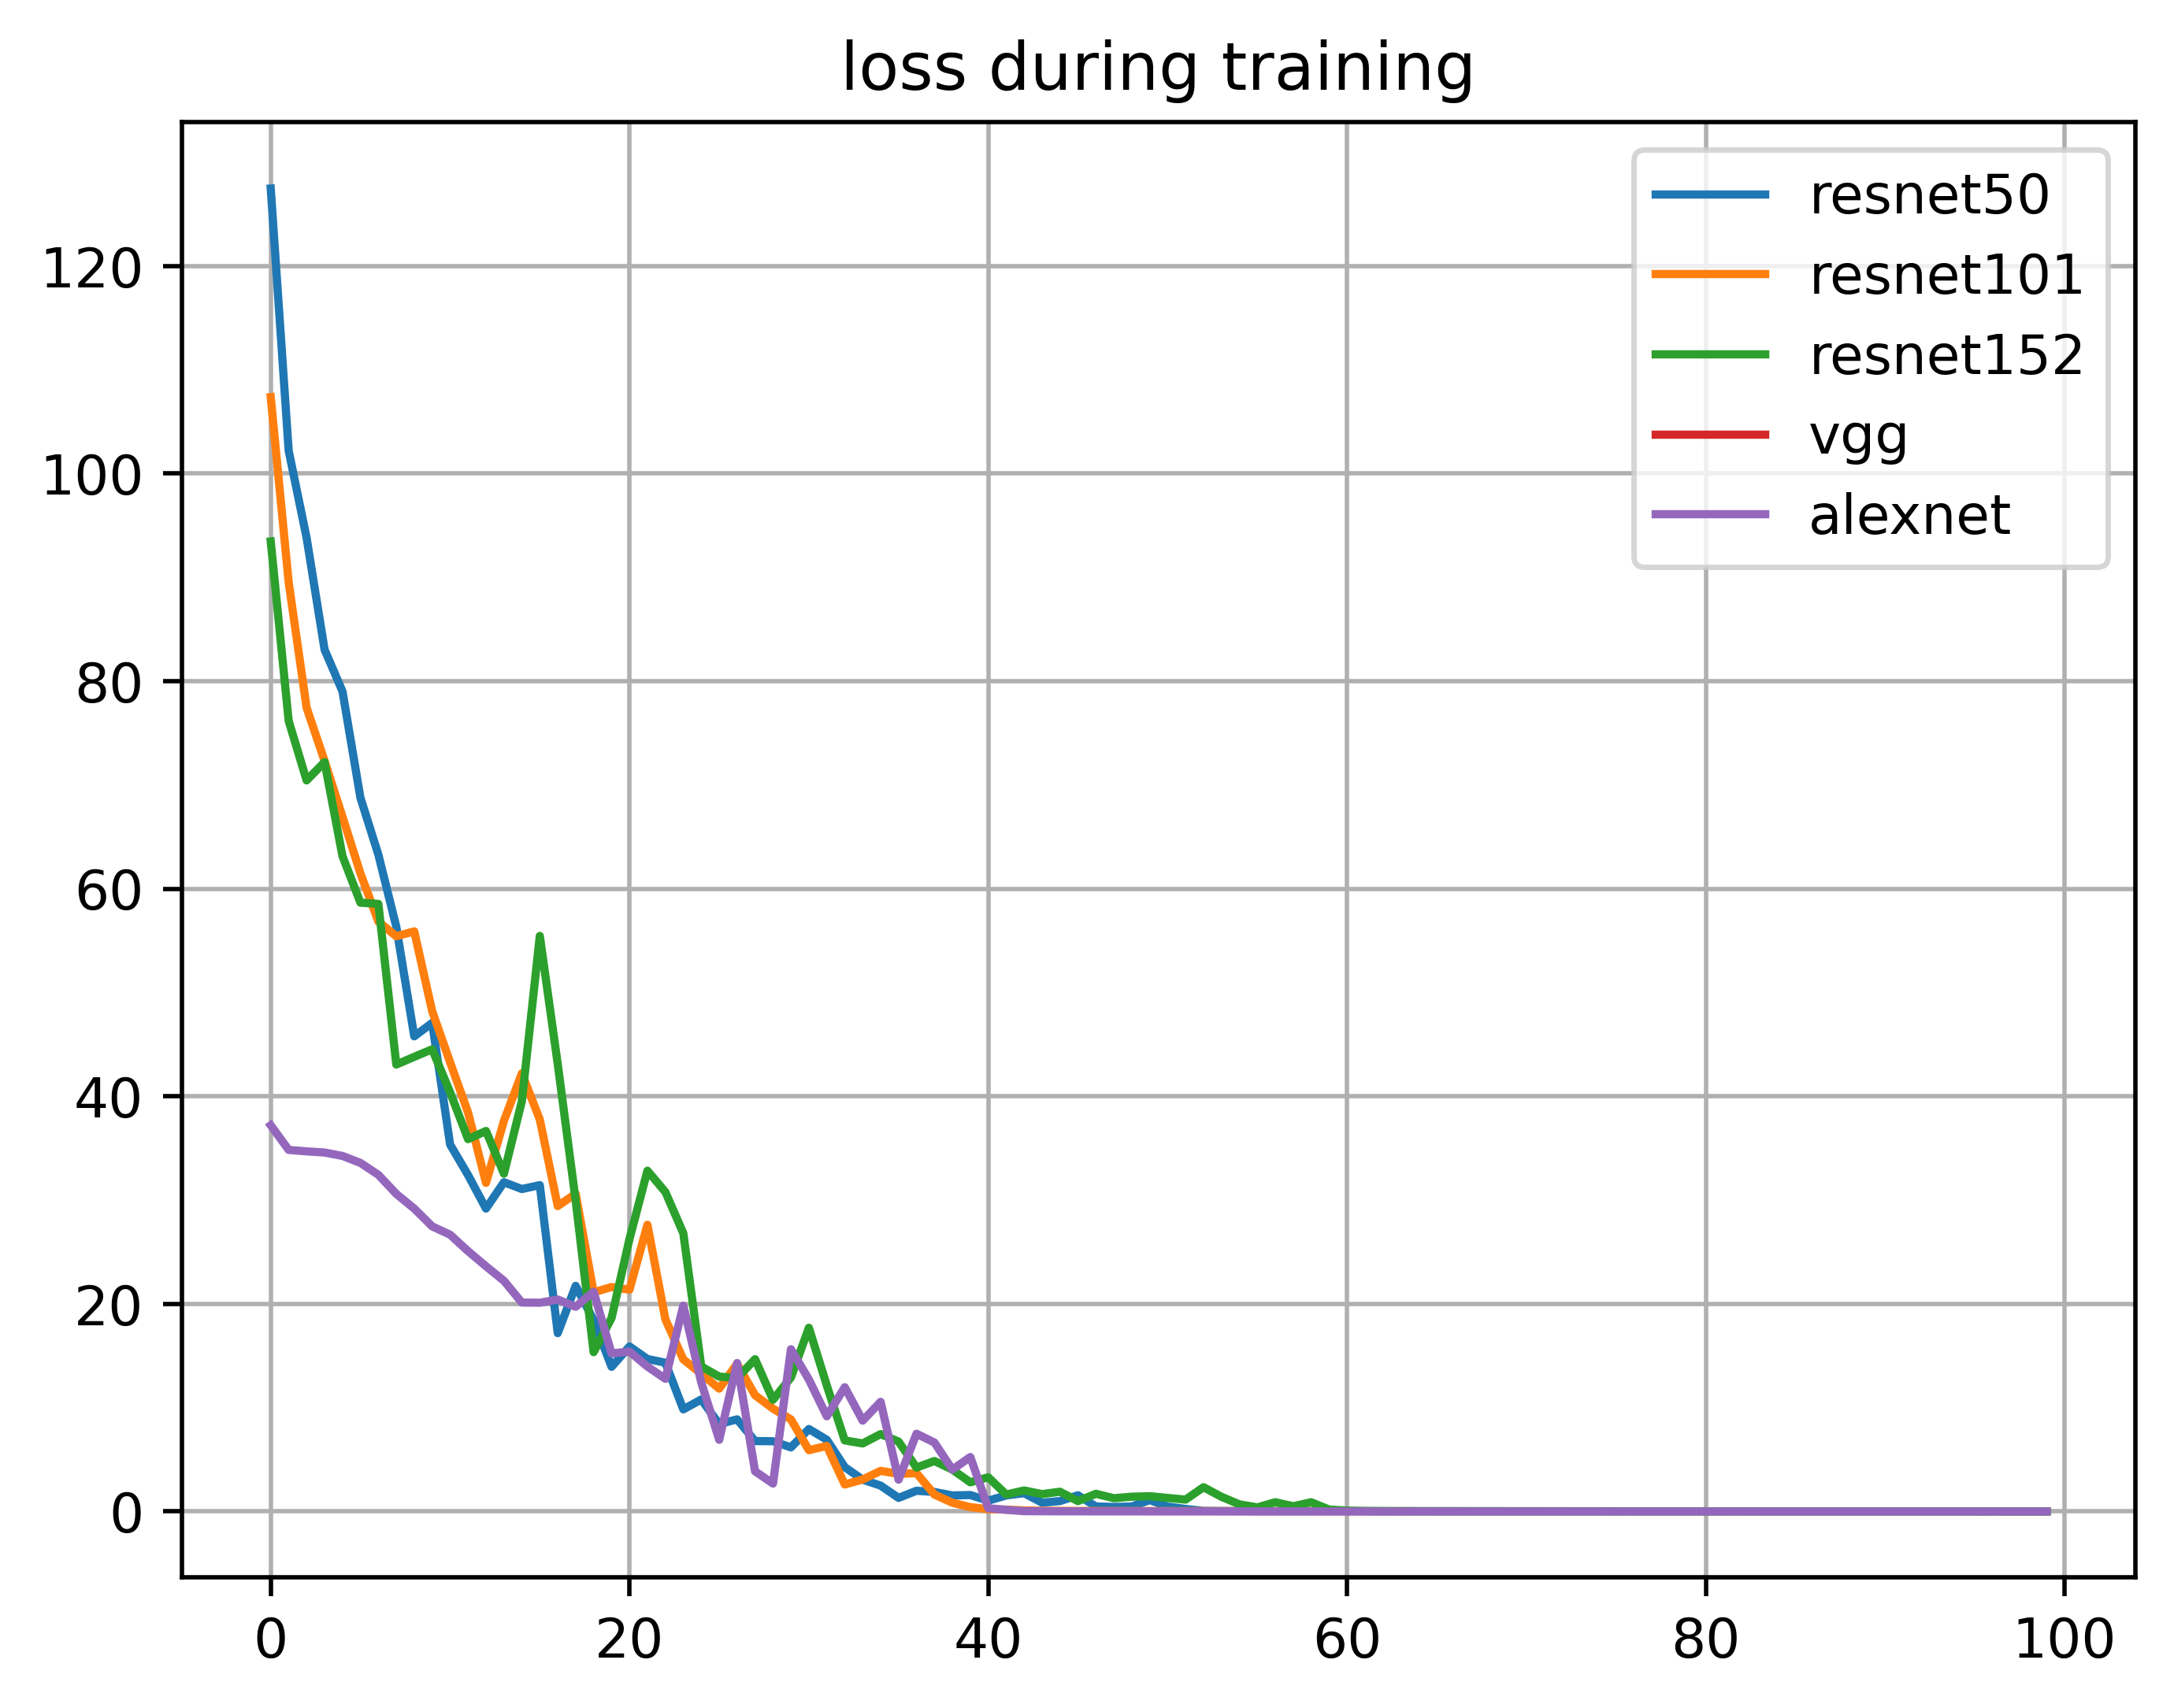

In [12]:
def draw_loss(resnet_loss,resnet_loss101,resnet_loss152,vgg_loss,alexnet_loss):
    for i in range(len(resnet_loss)):
        resnet_loss[i]=resnet_loss[i].detach().numpy()
    for i in range(len(resnet_loss101)):
        resnet_loss101[i]=resnet_loss101[i].detach().numpy()
    for i in range(len(resnet_loss152)):
        resnet_loss152[i]=resnet_loss152[i].detach().numpy()
    for i in range(len(vgg_loss)):
        vgg_loss[i]=vgg_loss[i].detach().numpy()
    for i in range(len(alexnet_loss)):
        alexnet_loss[i]=alexnet_loss[i].detach().numpy()
        
    plt.figure(dpi=500)         
    plt.title('loss during training')  #标题
    length=range(len(alexnet_loss))
    plt.plot(length, resnet_loss, label="resnet50")
    plt.plot(length, resnet_loss101, label="resnet101")
    plt.plot(length, resnet_loss152, label="resnet152")
    plt.plot(length, vgg_loss, label="vgg")
    plt.plot(length, alexnet_loss, label="alexnet")
    plt.legend()
    plt.grid()
    plt.savefig('C:\\Users\\55019\\Desktop\\result_gray\\loss.png')
    plt.show()
    
    
draw_loss(resnet_loss,resnet_loss101,resnet_loss152,vgg_loss,alexnet_loss)